In [130]:
import cv2
import numpy as np 
from skimage import filters
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.metrics import mean_squared_error
from skimage.metrics import structural_similarity as ssim

## Numpy

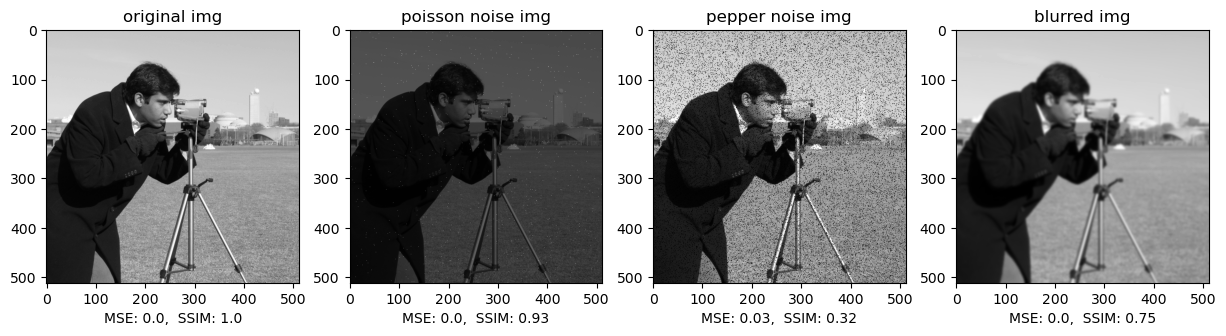

In [138]:
# Images
img = img_as_float(data.camera())

noise1 = np.random.rand(512, 512) * 0.005
poisson_noise = np.random.poisson(noise1)
poisson_noise_img = img + poisson_noise

noise2 = np.random.rand(512, 512)
pepper_noise = noise2 < 0.9 * 1
pepper_noise_img = img * pepper_noise

blurred_img = filters.gaussian(img, sigma=2)


# Metric - MSE, SSIM
mse_none = mean_squared_error(img, img)
ssim_none = ssim(img, img, data_range=img.max() - img.min())

mse_poisson = mean_squared_error(img, poisson_noise_img)
ssim_poisson = ssim(img, poisson_noise_img, data_range=poisson_noise_img.max() - poisson_noise_img.min())

mse_pepper = mean_squared_error(img, pepper_noise_img)
ssim_pepper = ssim(img, pepper_noise_img, data_range=pepper_noise_img.max() - pepper_noise_img.min())

mse_blur = mean_squared_error(img, blurred_img)
ssim_blur = ssim(img, blurred_img, data_range=blurred_img.max() - blurred_img.min())


plt.figure(figsize=(15,10))
plt.subplot(141)
plt.imshow(img, cmap='gray')
plt.xlabel(f"MSE: {mse_none},  SSIM: {ssim_none}")
plt.title("original img")

plt.subplot(142)
plt.imshow(poisson_noise_img, cmap='gray')
plt.title("poisson noise img")
plt.xlabel(f"MSE: {round(mse_poisson,2)},  SSIM: {round(ssim_poisson,2)}")

plt.subplot(143)
plt.imshow(pepper_noise_img, cmap='gray')
plt.title("pepper noise img")
plt.xlabel(f"MSE: {round(mse_pepper,2)},  SSIM: {round(ssim_pepper,2)}")

plt.subplot(144)
plt.imshow(blurred_img, cmap='gray')
plt.title("blurred img")
plt.xlabel(f"MSE: {round(mse_blur,2)},  SSIM: {round(ssim_blur,2)}")

plt.show()

## Pytorch

In [140]:
import cv2
import torch
import numpy as np 
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [153]:
img = torch.from_numpy(data.camera())
img.dtype()

TypeError: 'torch.dtype' object is not callable

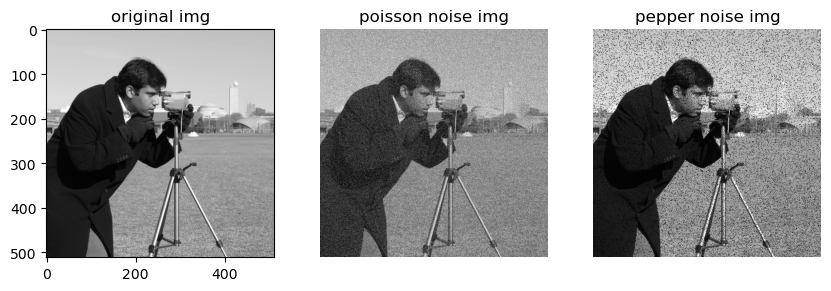

In [144]:
# Images
img = torch.from_numpy(data.camera())

noise1 = torch.rand(512, 512) * 100
poisson_noise = torch.poisson(noise1)
poisson_noise_img = img + poisson_noise

noise2 = torch.rand(512, 512)
pepper_noise = noise2 < 0.9 * 1
pepper_noise_img = img * pepper_noise


# Metric - MSE, SSIM
# mse_none = mean_squared_error(img, img)
# ssim_none = ssim(img, img, data_range=img.max() - img.min())

# mse_none = mean_squared_error(img, poisson_noise_img)
# ssim_none = ssim(img, poisson_noise_img, data_range=poisson_noise_img.max() - poisson_noise_img.min())

# mse_none = mean_squared_error(img, pepper_noise_img)
# ssim_none = ssim(img, pepper_noise_img, data_range=pepper_noise_img.max() - pepper_noise_img.min())


plt.figure(figsize=(10,10))
plt.subplot(131)
plt.imshow(img, cmap='gray')
# plt.xlabel(f"MSE: {mse_none},  SSIM: {ssim_none}")
plt.title("original img")

plt.subplot(132)
plt.imshow(poisson_noise_img, cmap='gray')
plt.title("poisson noise img")

plt.subplot(133)
plt.imshow(pepper_noise_img, cmap='gray')
plt.title("pepper noise img")

plt.show()

In [147]:
SSIM(img, poisson_noise_img)

RuntimeError: mean(): could not infer output dtype. Input dtype must be either a floating point or complex dtype. Got: Byte

In [146]:
def mean(img):
    return torch.mean(img)

def sigma(img):
    return torch.std(img)

def cov(img1, img2):
    x = torch.tensor(img1.shape, dtype=torch.float64)
    y = torch.tensor(img2.shape, dtype=torch.float64)
    return torch.mean(x * y) - mean(x) * mean(y)

def SSIM(img1, img2, L=256, K1=0.01, K2=0.03):
    C1 = K1 * K1 * L * L
    C2 = K2 * K2 * L * L
    C3 = C2 / 2
    
    I = (2 * mean(img1) * mean(img2) + C1) / (mean(img1)**2 + mean(y)**2 + C1)
    C = (2 * sigma(x) * sigma(y) + C2) / (sigma(x)**2 + sigma(y)**2 + C2)
    S = (cov(img1, img2) + C3) / (sigma(img1) * sigma(img2) + C3)
    
    return I * C * S

In [149]:
torch.mean(img)

RuntimeError: mean(): could not infer output dtype. Input dtype must be either a floating point or complex dtype. Got: Byte